In [1]:
%matplotlib inline
import datetime as dt
from AlgoTrading.Strategy import Strategy
from AlgoTrading.Backtest import strategyRunner

d:\Miniconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
from PyFin.api import MA
from PyFin.api import nthWeekDay
from PyFin.api import advanceDateByCalendar

class MovingAverageStrategy(Strategy):
    
    def __init__(self):
        
        short_sma = MA(10, 'close')
        long_sma = MA(60, 'close')
        self.signal = short_sma - long_sma
        
    def handle_data(self):
        
        for s in self.tradableAssets:
            if s[:2] != 'if':
                if self.signal[s] > 0 and self.secPos[s] == 0:
                    self.order(s, 1, 100)
                elif self.signal[s] < 0 and self.secPos[s] != 0 :
                    self.order(s, -1, 100)
                
        # 找到需要使用的主力合约
        current_time = self.current_datetime

        year = current_time.year
        month = current_time.month

        delDay = nthWeekDay(3, 6, month, year)
        changeContractDay = advanceDateByCalendar('China.SSE', delDay, '-1b')

        contract_month = month
        if current_time.date() >= changeContractDay:
            contract_month = month + 1

        ifc = 'if15%02d' % contract_month
        ifcOld = 'if15%02d' % month

        if month < contract_month and self.secPos[ifcOld] != 0:
            # 需要移仓， 平掉旧合约
            self.order_to(ifcOld, 1, 0)
            
        self.order_to(ifc, -1, 1)

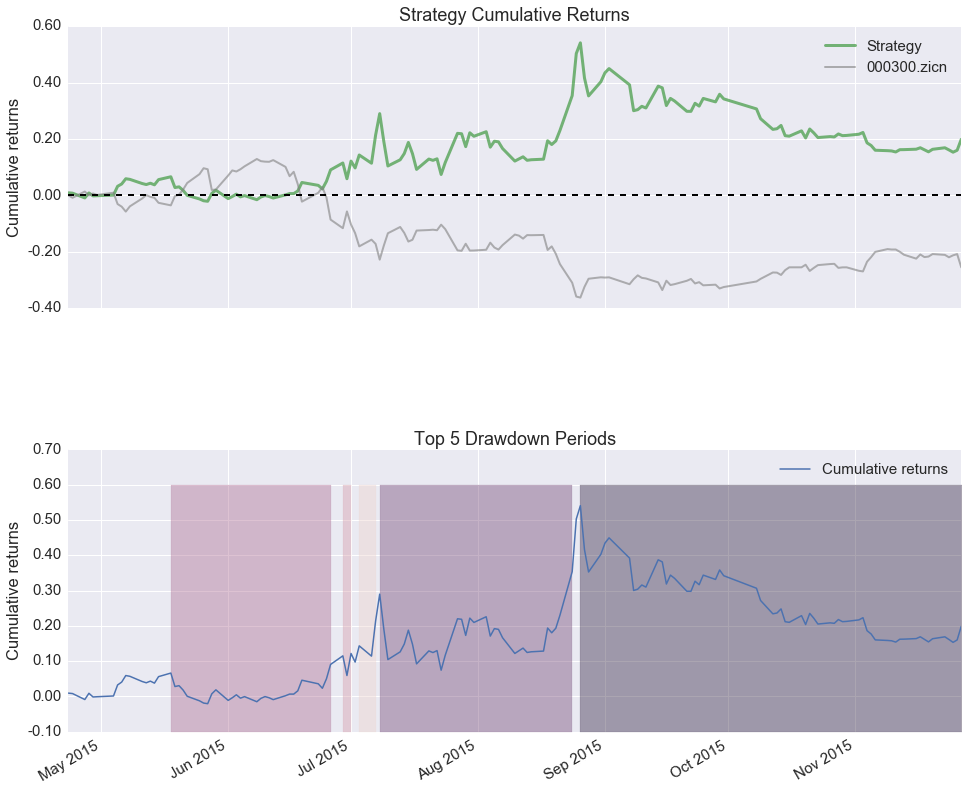

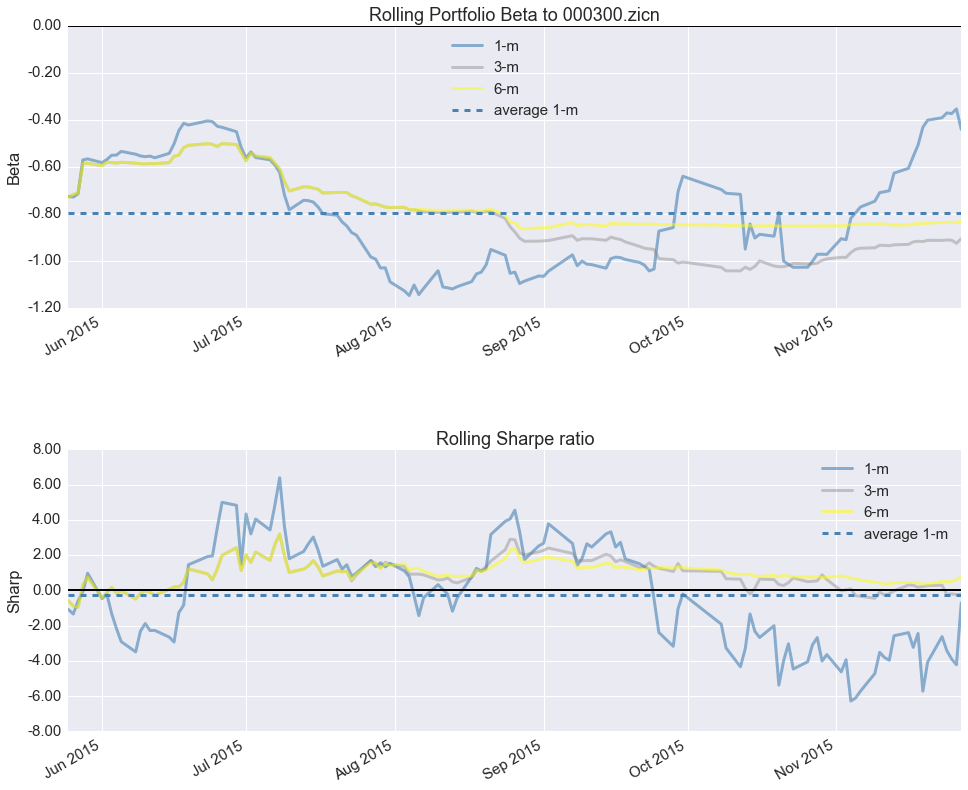

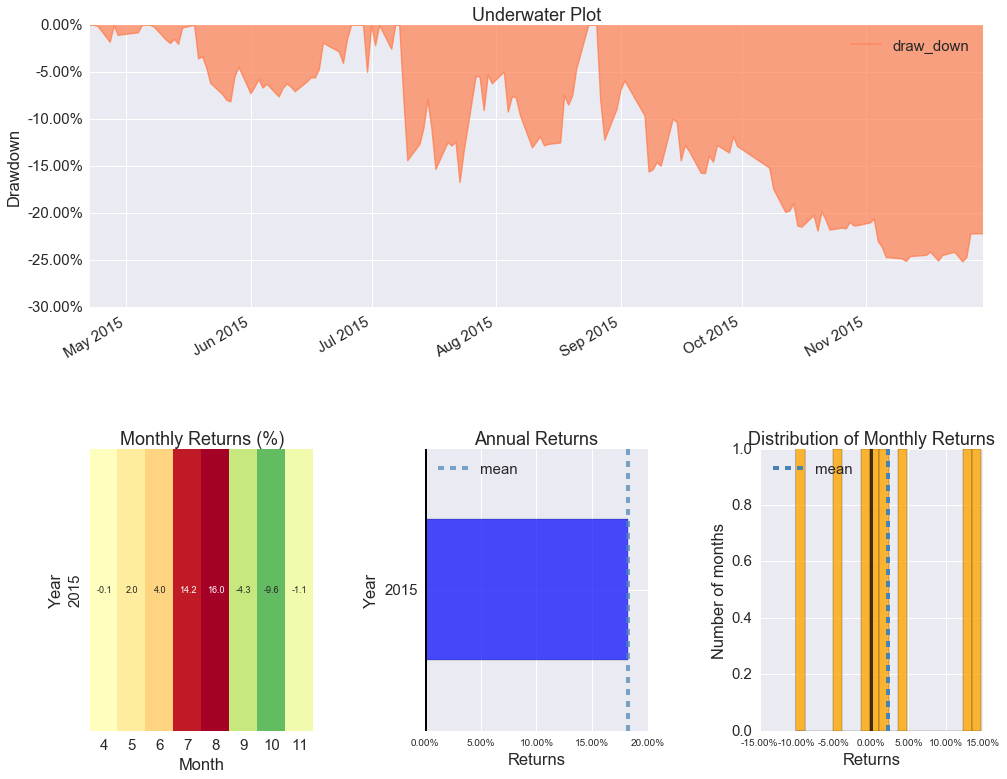

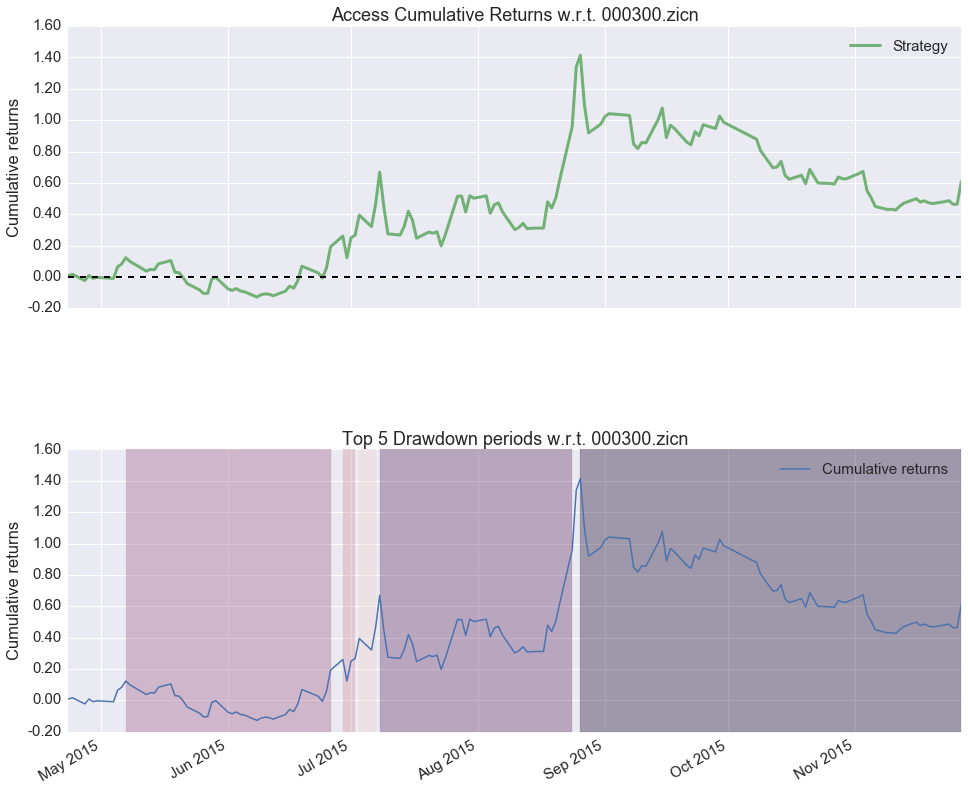

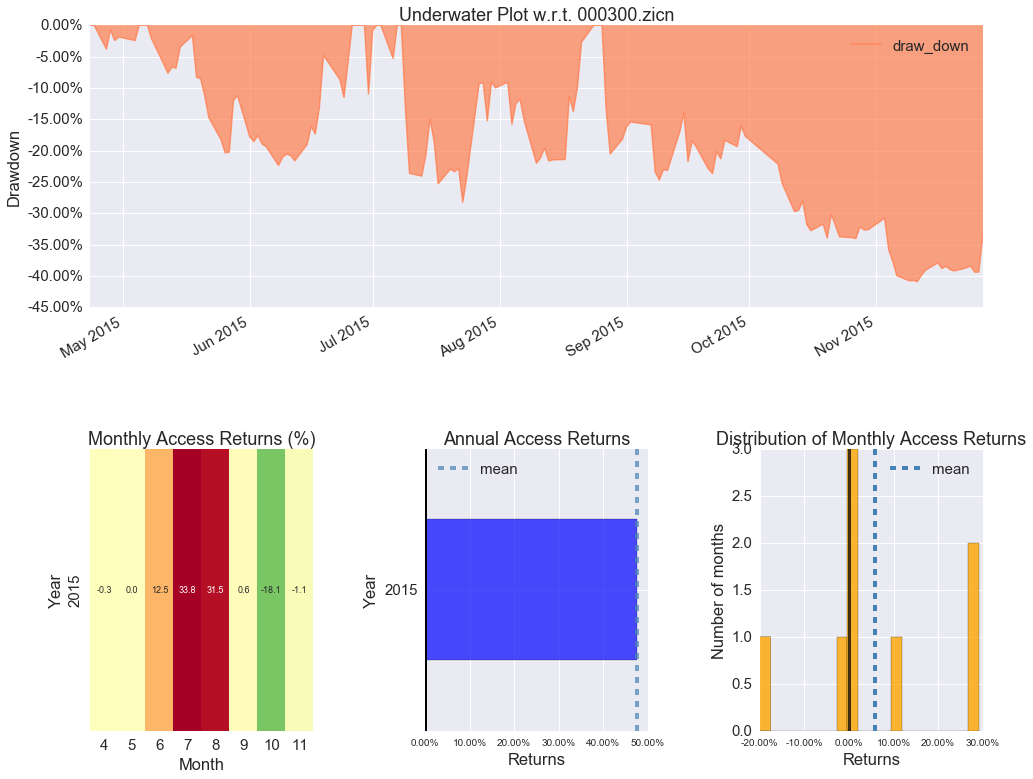

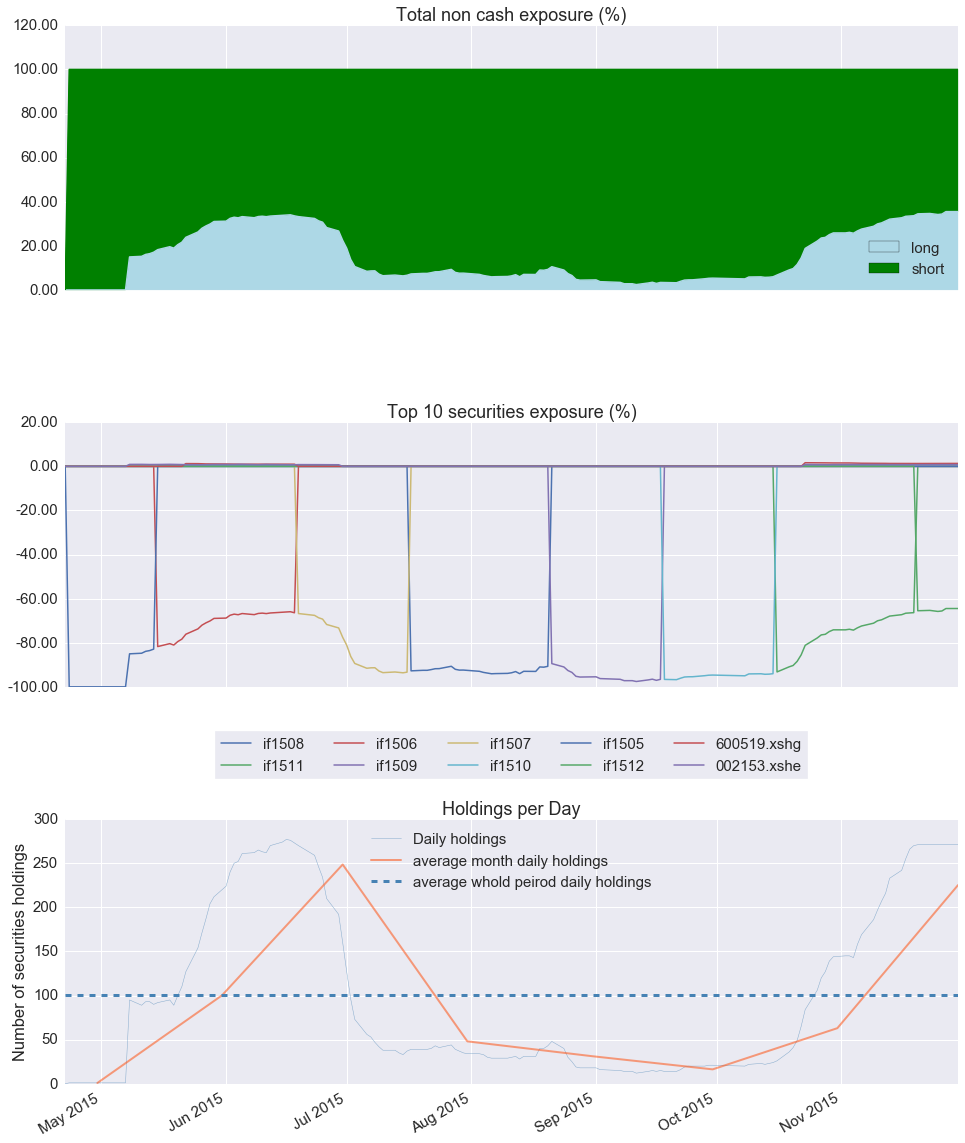

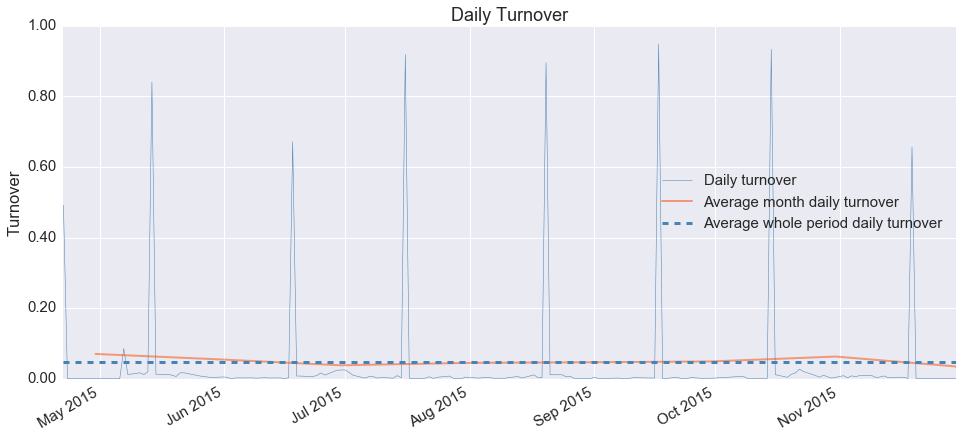

In [3]:
from AlgoTrading.Data import set_universe

stocks = set_universe('000300.zicn')
futures = ['if15%02d' % i for i in range(3, 13)]

universes = stocks + futures

res = strategyRunner(userStrategy=MovingAverageStrategy, 
                     symbolList=universes, 
                     startDate=dt.datetime(2015, 4, 22), 
                     endDate=dt.datetime(2015, 11, 30),
                     benchmark='000300.zicn')

In [10]:
import qgrid
qgrid.show_grid(res['perf_series'])